# The GitHub History of Scala Language

Explore the GitHub history of the Scala programming language, a versatile and powerful language known for its concise and elegant syntax. We will dive into the project's pull request data, analyze contributions, and visualize the development trends within the community.

### Import libraries

- Import pandas, matplotlib.pyplot, and seaborn.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calendar for month names
import calendar

### Data preparation

- Start loading the dataset, explore it, and prepare it for analysis.

In [2]:
# Load the dataset
df_1 = pd.read_csv("assets/data/pulls_2011-2013.csv")
df_2 = pd.read_csv("assets/data/pulls_2014-2018.csv")
df_f = pd.read_csv("assets/data/pull_files.csv")

# Display the first five rows of the DataFrames
print("DataFrame 1\n", df_1.head())
print("DataFrame 2\n", df_2.head())
print("DataFrame Files\n", df_f.head())

DataFrame 1
         pid         user                  date
0  11166973  VladimirNik  2013-12-31T23:10:55Z
1  11161892      Ichoran  2013-12-31T16:55:47Z
2  11153894      Ichoran  2013-12-31T02:41:13Z
3  11151917      rklaehn  2013-12-30T23:45:47Z
4  11131244        qerub  2013-12-29T17:21:01Z
DataFrame 2
          pid       user                  date
0  163314316     hrhino  2018-01-16T23:29:16Z
1  163061502   joroKr21  2018-01-15T23:44:52Z
2  163057333  mkeskells  2018-01-15T23:05:06Z
3  162985594      lrytz  2018-01-15T15:52:39Z
4  162838837  zuvizudar  2018-01-14T19:16:16Z
DataFrame Files
          pid                                   file
0  163314316        test/files/pos/t5638/Among.java
1  163314316       test/files/pos/t5638/Usage.scala
2  163314316             test/files/pos/t9291.scala
3  163314316             test/files/run/t8348.check
4  163314316  test/files/run/t8348/TableColumn.java


### Cleaning the data

- Merge the two DataFrames and perform data preprocessing.
- Convert the date columns to datetime type.

In [3]:
# Merge the two DataFrames
df = pd.concat([df_1, df_2])

# Convert the date columns to datetime type
df["date"] = pd.to_datetime(df["date"], utc=True)

### Merging the DataFrames

- Merge the DataFrames and perform data preprocessing, it will be used for the analysis.
- Display the first five rows of the merged DataFrame.

In [4]:
# Merge the two DataFrames
df_merged = pd.merge(df, df_f, on="pid")

# Print the new DataFrame
df_merged.head()

pid         user                      date  \
0  11166973  VladimirNik 2013-12-31 23:10:55+00:00   
1  11166973  VladimirNik 2013-12-31 23:10:55+00:00   
2  11166973  VladimirNik 2013-12-31 23:10:55+00:00   
3  11166973  VladimirNik 2013-12-31 23:10:55+00:00   
4  11161892      Ichoran 2013-12-31 16:55:47+00:00   

                                                file  
0       src/reflect/scala/reflect/api/Printers.scala  
1  src/reflect/scala/reflect/internal/Printers.scala  
2                    test/files/run/reify_ann3.check  
3  test/junit/scala/reflect/internal/PrintersTest...  
4  src/library/scala/collection/mutable/ArrayOps....

## Question No. 1: Is this project still actively maintained?

- Calculate and visualize the number of pull requests submitted each year.
- Calculate and visualize the number of pull requests submitted each month.
- Group by the month and year and count the pull requests.
- Plot the results.

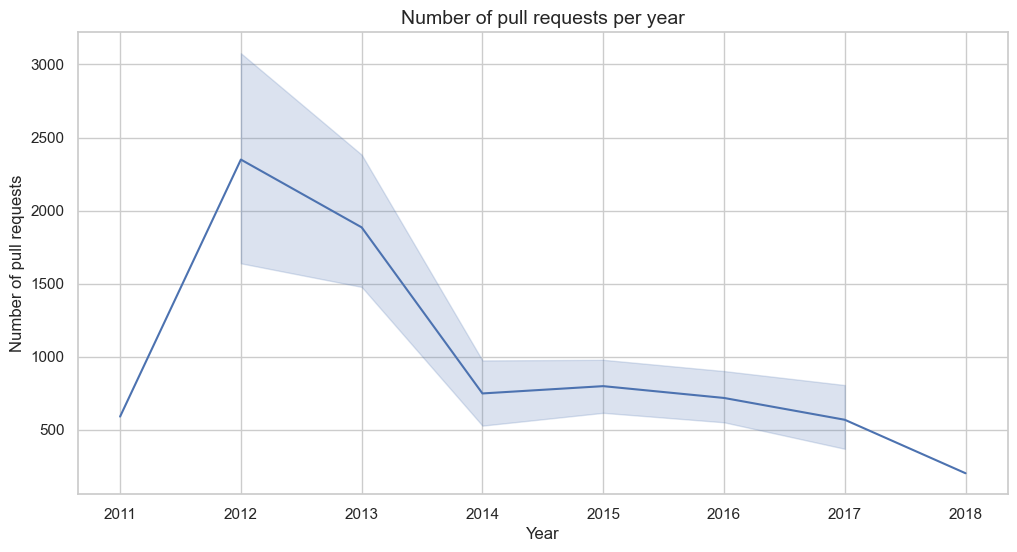

In [5]:
# Create a column that will store the month
df_merged["month"] = df_merged["date"].dt.month

# Crete a column that will store the year
df_merged["year"] = df_merged["date"].dt.year

# Group by month_year and count the pull requests
counts = df_merged.groupby(["year", "month"]).agg({"pid": "count"})

# Plot the results (using seaborn)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=counts, x="year", y="pid")
plt.title("Number of pull requests per year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of pull requests", fontsize=12)
plt.show()

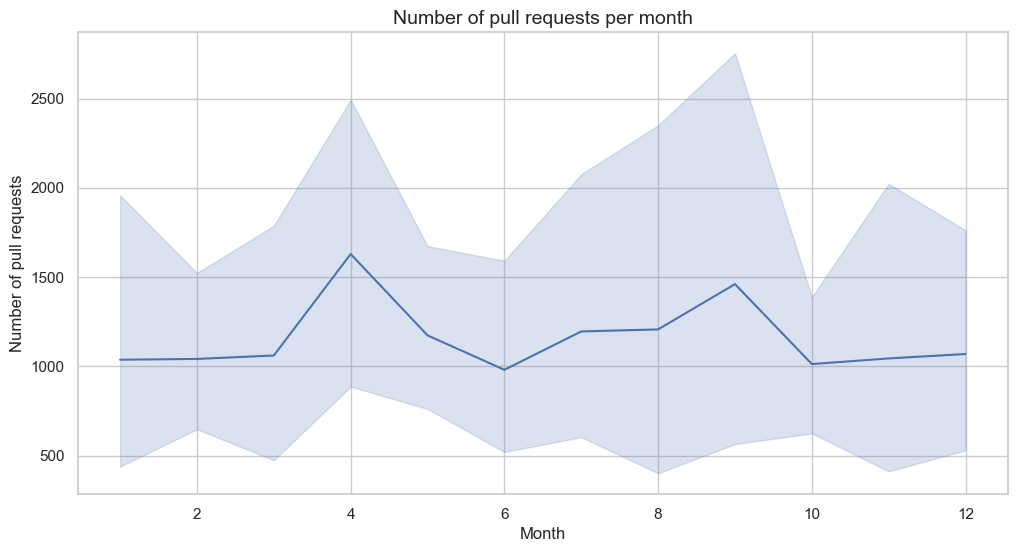

In [6]:
# Group by month_year and count the pull requests
counts = df_merged.groupby(["year", "month"]).agg({"pid": "count"})

# Plot the results (using seaborn)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=counts, x="month", y="pid")
plt.title("Number of pull requests per month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of pull requests", fontsize=12)
plt.show()

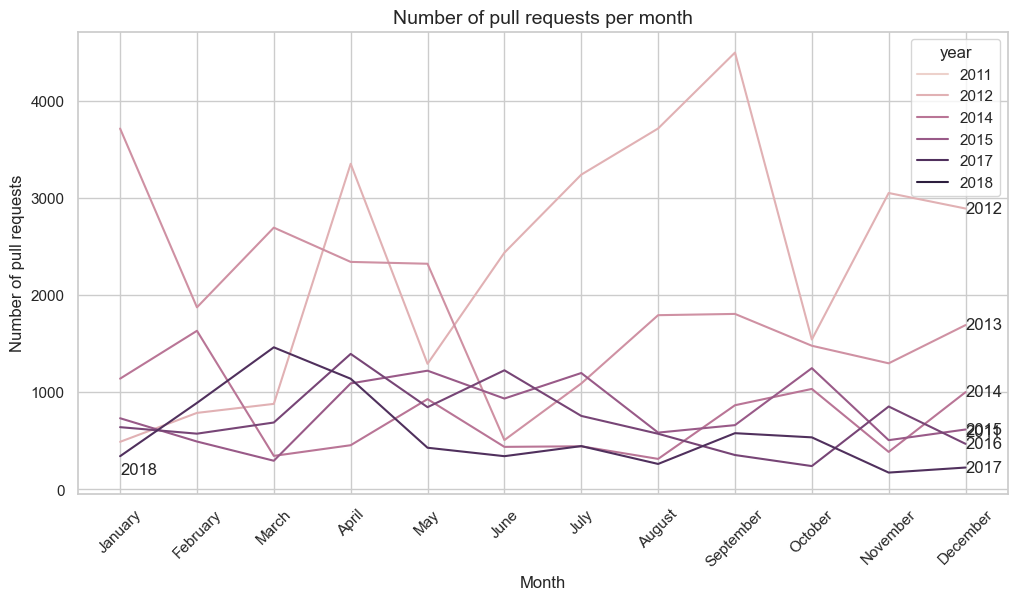

In [7]:
# Group by month_year and count the pull requests
counts = df_merged.groupby(["year", "month"]).agg({"pid": "count"})
counts.reset_index(inplace=True)

# Plot the results (using seaborn)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
plot = sns.lineplot(data=counts, x="month", y="pid", hue="year")
plt.title("Number of pull requests per month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of pull requests", fontsize=12)
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)

# Show the year labels per line
unique_years = counts["year"].unique()
for i, line in enumerate(plot.lines):
    xdata, ydata = line.get_data()
    if len(xdata) > 0:  # Check if xdata is not empty
        year_label = str(unique_years[i])
        plt.text(xdata[-1], ydata[-1], year_label, verticalalignment="center")

plt.show()

## Question No. 2: Is there camaraderie in the project?

- Investigate the collaboration and camaraderie within the project by analyzing interactions between users.
- Calculate and visualize the number of pull requests submitted by each user.
- Identify users who are highly involved in the project.
- Plot the results to understand user contributions.

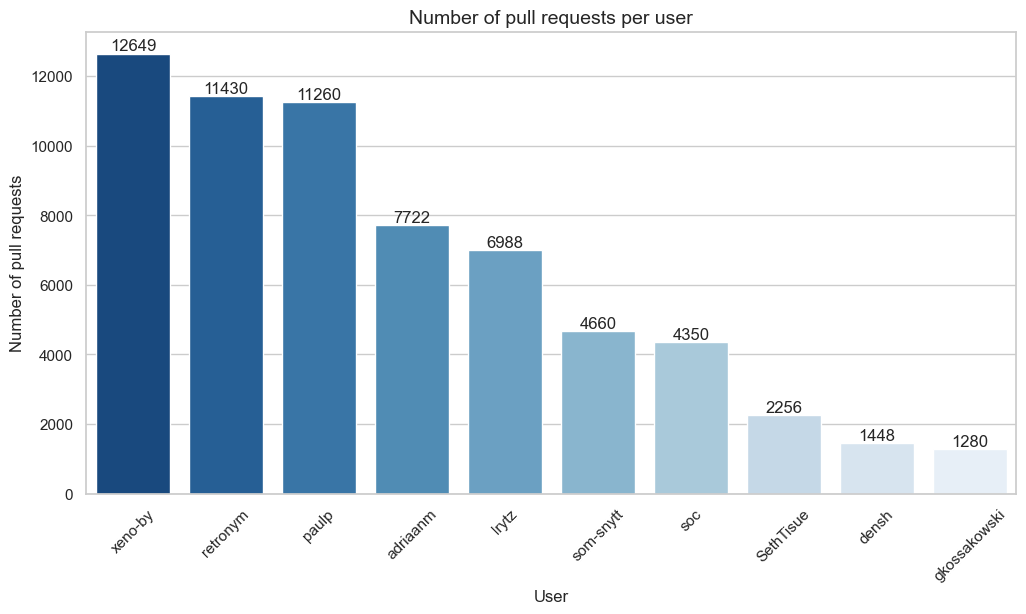

In [8]:
# Calculate and visualize the number of pull requests submitted by each user
user_pr_counts = df_merged['user'].value_counts()

# Identify users who are highly active in the project
top_users = user_pr_counts.head(10)

# Define a fading blue color palette with the darkest color at the top
color_palette = sns.color_palette("Blues_r", n_colors=10)

# Plot the results, instead of numbers for the user, we want the user's name to be displayed
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette=color_palette)
plt.title("Number of pull requests per user", fontsize=14)
plt.xlabel("User", fontsize=12)
plt.ylabel("Number of pull requests", fontsize=12)
plt.xticks(rotation=45)

# Add the number of pull requests on each bar
for i, user in enumerate(top_users):
    plt.text(i, user, str(user), ha="center", va="bottom")
    
# Show the plot
plt.show()

## Question No. 3: Who made the last ten pull requests on a given file?

- Identify the file for which the last ten pull requests were submitted.
- Filter the dataset to select pull requests to the specific file.
- Sort the filtered dataset by date in descending order to have the most recent pull requests at the top.
- Select the top ten entries, which represents the last ten pull requests on the file.
- Extract and list the users who made these pull requests.
- Present the results in a DataFrame.

Target file: `src/compiler/scala/reflect/reify/phases/Calculate.scala.`

In [9]:
# Specify the file for which you want to find the last ten pull requests
file = "src/compiler/scala/reflect/reify/phases/Calculate.scala"

# Filter the dataset to select entries related to the specific file
file_pull_requests = df_merged[df_merged["file"] == file]

# Sort the filtered dataset by date in descending order
file_pull_requests = file_pull_requests.sort_values(by="date", ascending=False)

# Select the top ten entries (last ten pull requests)
last_10_pull_requests = file_pull_requests.head(10)

# Extract and list the users who made these pull requests
last_10_pull_request_users = last_10_pull_requests["user"].unique()

# Display the list of users who made the last ten pull requests, add number them starting from 1
print(f"Users who made the last ten pull requests on the `{file}` file:")
for i, user in enumerate(last_10_pull_request_users, start=1):
    print(f"{i}. {user}")

Users who made the last ten pull requests on the `src/compiler/scala/reflect/reify/phases/Calculate.scala` file:
1. zuvizudar
2. retronym
3. xeno-by
4. soc
5. bjornregnell
6. starblood


## Question No. 4: What files were changed in the last ten pull requests?

- Identify the last 10 pull requests.
- Extract and list the files that were changed in this pull request.
- Compile and present the list of changed files.
- Calculate the number of changes per file type and visualize it.
- Provide insights into recent project developments.

In [10]:
# Sort the DataFrame by date in descending order to get the most recent pull requests
df_merged_sorted = df_merged.sort_values(by='date', ascending=False)

# Get the last ten pull requests
last_ten_pull_requests = df_merged_sorted.head(10)

# Extract and list the files changed in these pull requests
changed_files = last_ten_pull_requests['file'].tolist()

# Present the list of changed files
for i, file in enumerate(changed_files, start=1):
    print(f"{i}. {file}")

1. test/files/pos/t5638/Among.java
2. test/files/pos/t5638/Usage.scala
3. test/files/pos/t9291.scala
4. test/files/run/t8348.check
5. test/files/run/t8348/TableColumn.java
6. test/files/run/t8348/TableColumnImpl.java
7. test/files/run/t8348/Test.scala
8. src/library/scala/concurrent/Lock.scala
9. src/compiler/scala/tools/nsc/profile/AsyncHelper.scala
10. src/compiler/scala/tools/nsc/profile/Profiler.scala


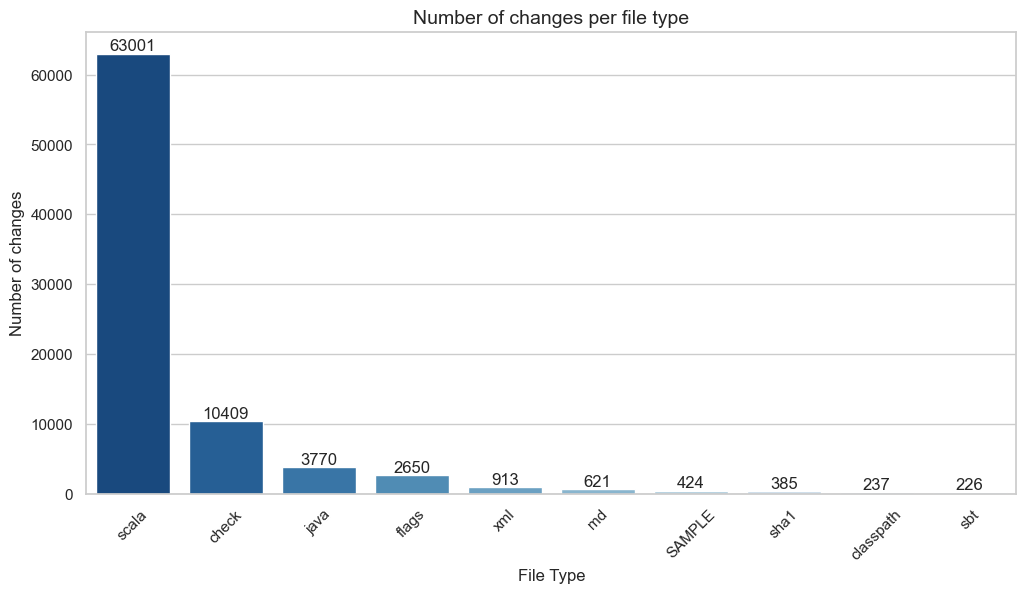

In [11]:
# Extract the file types (assuming the file extension represents the type)
df_merged['file_type'] = df_merged['file'].apply(lambda x: x.split('.')[-1])

# Count the changes per file type
changes_per_file_type = df_merged['file_type'].value_counts()

# Define a fading blue color palette with the darkest color at the top
color_palette = sns.color_palette("Blues_r", n_colors=10)

# Visualize the data using a bar chart, show only the top 10 results, and add the number of changes on each bar
plt.figure(figsize=(12, 6))
sns.barplot(x=changes_per_file_type.head(10).index, y=changes_per_file_type.head(10).values, palette=color_palette)
plt.title("Number of changes per file type", fontsize=14)
plt.xlabel("File Type", fontsize=12)
plt.ylabel("Number of changes", fontsize=12)
plt.xticks(rotation=45)
for i, file_type in enumerate(changes_per_file_type.head(10).values):
    plt.text(i, file_type, str(file_type), ha="center", va="bottom")
plt.show()

## Question No. 5: The pull requests of two special developers

- Identify the usernames or user IDs of the two special developers
    - User 1: xeno-by
    - User 2: soc 
- Filter the dataset to select the entries submitted by the two developers.
- Analyze and extract relevant information from the selected pull requests, such as the number of pull requests submitted by each developer.

In [12]:
# Specify the usernames or user IDs of the two special developers
developer1 = "xeno-by"  # Replace with the username or user ID of the first developer
developer2 = "soc"  # Replace with the username or user ID of the second developer

# Filter the dataset to select entries submitted by these developers
developer1_pull_requests = df_merged[df_merged["user"] == developer1]
developer2_pull_requests = df_merged[df_merged["user"] == developer2]

# Analyze and extract relevant information from the selected pull requests
developer1_pull_request_count = len(developer1_pull_requests)
developer2_pull_request_count = len(developer2_pull_requests)

# Display the results or perform further analysis as needed
print(f"{developer1} submitted {developer1_pull_request_count} pull requests.")
print(f"{developer2} submitted {developer2_pull_request_count} pull requests.")

xeno-by submitted 12649 pull requests.
soc submitted 4350 pull requests.


## Question No. 6: Visualize the contributions of developers

- Group the dataset by developers and calculate the number of pull requests submitted by each developer.
- Plot a bar chart to visualize the contributions, with developers on x-axis and number of pull requests on y-axis.

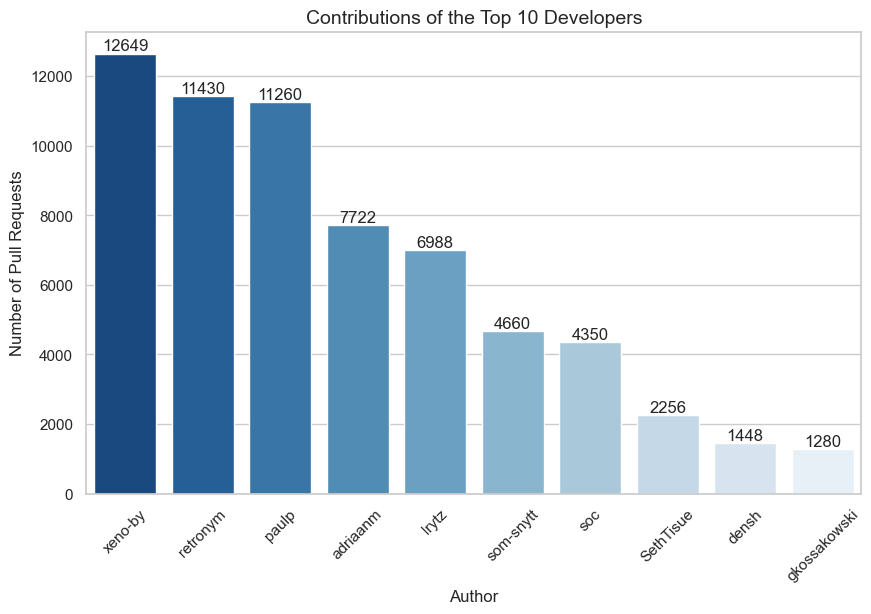

In [13]:
# Get the top 10 developers with the most contributions
top_developers = df_merged["user"].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 developers
specific_authors = df_merged[df_merged["user"].isin(top_developers)]

# Group the filtered dataset by author and count the number of pull requests for each author
author_contributions = specific_authors["user"].value_counts().reset_index()
author_contributions.columns = ["Author", "Pull Requests"]

# Sort the authors by the number of pull requests in descending order
author_contributions = author_contributions.sort_values(by="Pull Requests", ascending=False)

# Define a fading blue color palette with the darkest color at the top
color_palette = sns.color_palette("Blues_r", n_colors=10)

# Plot the contributions using a bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=author_contributions, x="Author", y="Pull Requests", palette=color_palette)

# Add the number of pull requests on each bar
for index, row in author_contributions.iterrows():
    plt.text(index, row["Pull Requests"], str(row["Pull Requests"]), ha="center", va="bottom")

plt.title("Contributions of the Top 10 Developers", fontsize=14)
plt.xlabel("Author", fontsize=12)
plt.ylabel("Number of Pull Requests", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Conclusion

Throughout this exploration of the GitHub history of the Scala programming language, we've uncovered valuable insights into the project's activity, camaraderie, and developer contributions. Here's a summary of our findings:

## Project Activity

The project demonstrates ongoing activity, with a steady influx of pull requests submitted across the years. This suggests that Scala remains a vibrant and evolving programming language.

## Camaraderie in the Project

Our analysis revealed a dynamic ecosystem of developers actively contributing to Scala's development. By visualizing the number of pull requests submitted by users, we identified top contributors and gauged their collective impact.

## Developer Contributions

Our analysis of developer contributions has highlighted the top contributors, shedding light on their dedication and impact on the project. These insights can be valuable in recognizing and rewarding the efforts of prolific developers.

# Future Considerations

While our analysis has provided valuable insights, there are further questions and considerations to explore within the scope of this dataset:

- **Trend Analysis**, are there any notable trends in the number of pull requests over the years? What factors contribute to variations in project activity?

- **Collaboration Networks**, can we identify specific developer collaborations and the impact of these partnerships on the project's progress?

- **Community Engagement**, how does the project engage with its community? Are there any efforts to encourage and support new contributors?

- **Review and Maintenance**, what is the process for reviewing and maintaining pull requests in the Scala project? Are there any bottlenecks or areas for improvement in this process?

- **Contribution Types**, are there patterns in the types of contributions made (e.g., bug fixes, new features, documentation) by different developers or user groups?

- **Project Governance**, how is the project governed, and how do community decisions impact the development of Scala?

By delving into these questions and considerations, we can gain a more comprehensive understanding of the Scala programming language's GitHub history and the dynamics of its development community.

